In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Данные скачаны из https://www.kaggle.com/c/titanic/data?select=test.csv. 
train.csv - вот этот файл

In [2]:
path_to_data = "/mnt/c/my_mnt_c/Code/my_github/python_bioinf_2021/train_titanic.csv"

df = pd.read_csv(path_to_data)

Знакомство с данными:
* как они выглядят
* что значат
* какие данные отсутствуют?

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
words = df.columns.values
na_data_for_cols = df.isna().sum()
description = ["Id in dataset",
               "0 - died, 1 - survived",
               "Ticket сlass (Upper, Middle, Lower)",
               "Name", "Sex", "Age",
               "Number of siblings or partners",
               "Number of children / parents",
               "ticket number",
               "Money paid for travel",
               "Number of the room (cabin)",
               "Place where the travel start or end"]

temp_df = pd.DataFrame({"NA": na_data_for_cols, "description": description})

temp_df

,NA,description
PassengerId,0,Id in dataset
Survived,0,"0 - died, 1 - survived"
Pclass,0,"Ticket сlass (Upper, Middle, Lower)"
Name,0,Name
Sex,0,Sex
Age,177,Age
SibSp,0,Number of siblings or partners
Parch,0,Number of children / parents
Ticket,0,ticket number
Fare,0,Money paid for travel


Видим, что больше меньше всего данных о комнатах и о возрасте. 
Интересно,  а у кого из пассажиров был не известен возраст?
Посмотрим распределение по классам.

In [5]:
df_3 = df.Age.isnull().groupby(df['Pclass']).sum().astype(int).reset_index(name='Age_NA')
df_3

,Pclass,Age_NA
0,1,30
1,2,11
2,3,136


<AxesSubplot:ylabel='Age_NA'>

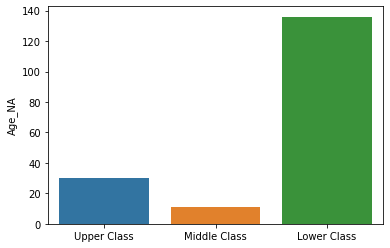

In [6]:
sns.barplot(x=["Upper Class", "Middle Class", "Lower Class"], y="Age_NA", data=df_3)

Видим, что для людей с самыми дешевыми билетами возраст не известен наиболее часто.
Я не смогла найти объяснений этому явлению, но могу предположить, 
что помимо утраты данных сдесь могло сыграть роль то, что люди из нижнижних слоев общества могли точно не знать свой возраст.

Данные о комнате проживания отсутствуют для многих, поэтому их придется отложить, хотя интересно влияло ли проживание в том или ином месте корабля (близость к спасательным шлюпкам) на спасение.

In [7]:
# удаляю переменную про комнаты
df_2 = df.drop(labels=["Cabin"], axis=1)
# удаляю надлюдения для которых отсутствует возраст 
df_2 = df_2.dropna()

<AxesSubplot:>

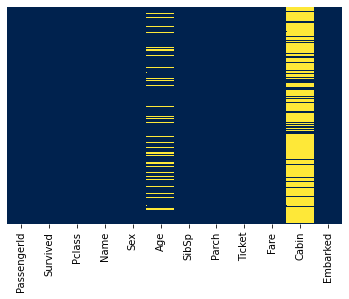

In [8]:
# Еще раз смотрю на графике на то, сколько было пропущенных значений
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='cividis')

<AxesSubplot:>

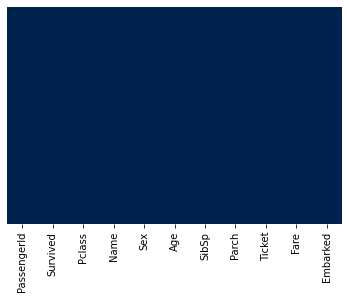

In [9]:
# и проверяю, что их не осталось
sns.heatmap(df_2.isnull(), yticklabels=False, cbar=False, cmap='cividis')

Теперь хочу посмотреть на прикидочный график - pairplot. 
Он покажет мне корреляции между переменными и распределения переменных.

Только выкину из данных PassengerId

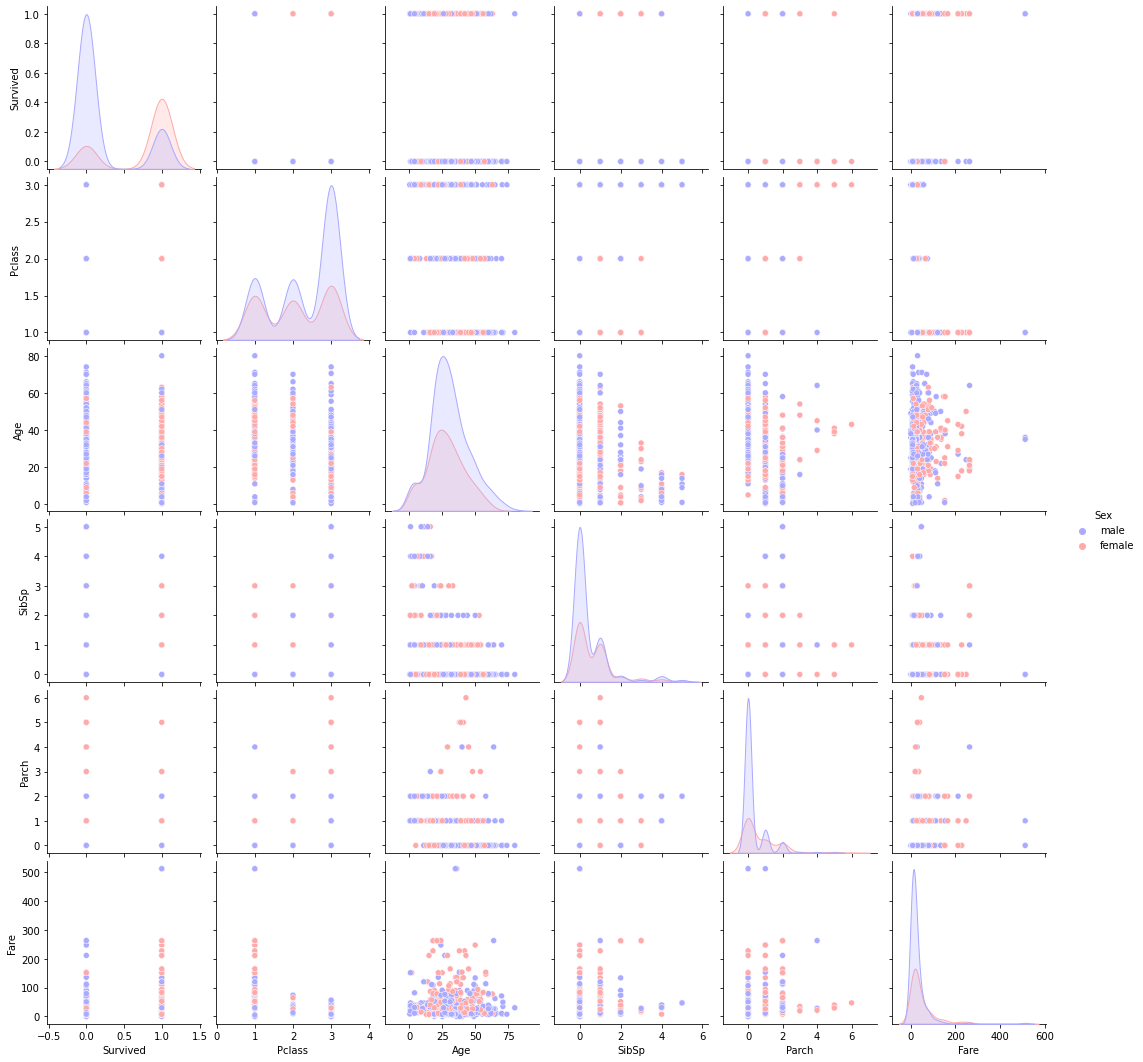

In [10]:
# pairplot
sns.pairplot(df_2.drop(['PassengerId'], axis=1), hue="Sex", palette="bwr")

Исходя из графика:
    
    * Мужчин больше погибло чем спаслось
    
    * а женщин больше спаслось чем погибло
    
    * женщины примерно равно расперелены по разным классам
    
    * а вот мужчин больще в третьем классе, который самый дешевый
    
    * среди детей м и ж представлены примерно одинаково
    
    * среди взрослых гораздо больще женщин

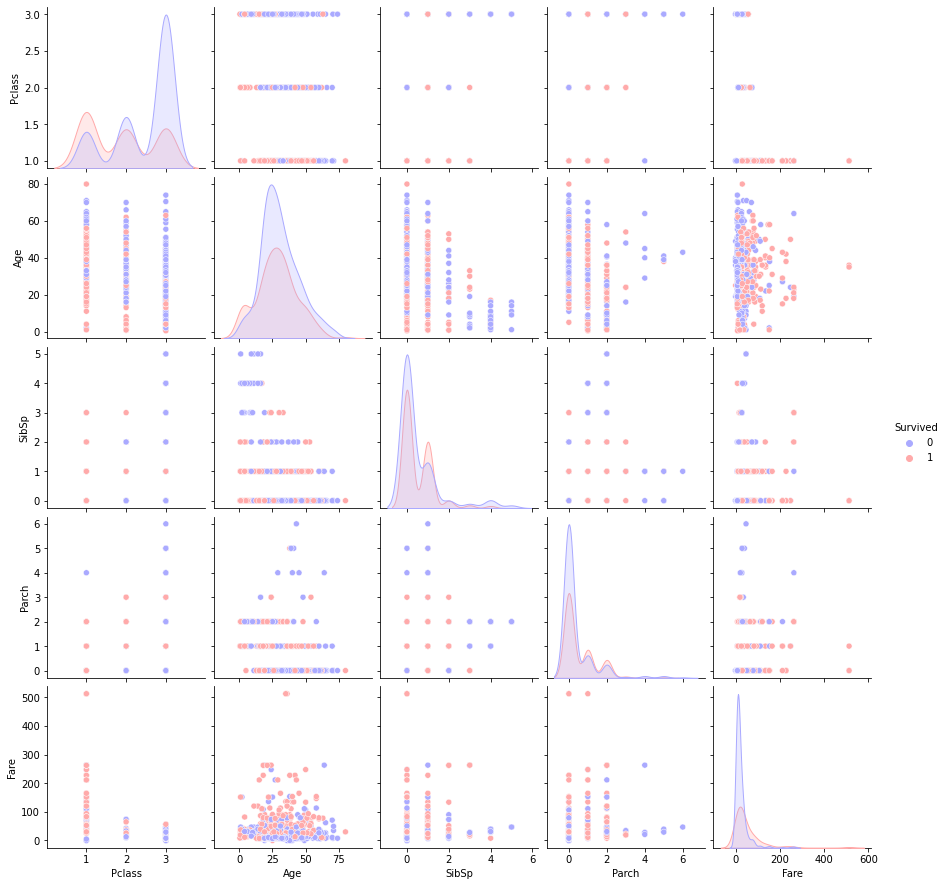

In [11]:
# pairplot
sns.pairplot(df_2.drop(['PassengerId'], axis=1), hue="Survived", palette="bwr")

Исходя из графика:

    * больше всего погибло в третьем классе
    
    * меньше всего погибло в первом классе
    
    * детей погибло не так много как взрослых, кажется еще старикам повезло выжить, но на это я хочу потом посмотреть отдельно
    
    * кажется наличие родственников не сильно увеличивает шанс выжить, но это надо уточнить
    
    * очень богатые (или расточительные) люди выживали, но на это тоже хочу посмотреть отдельно

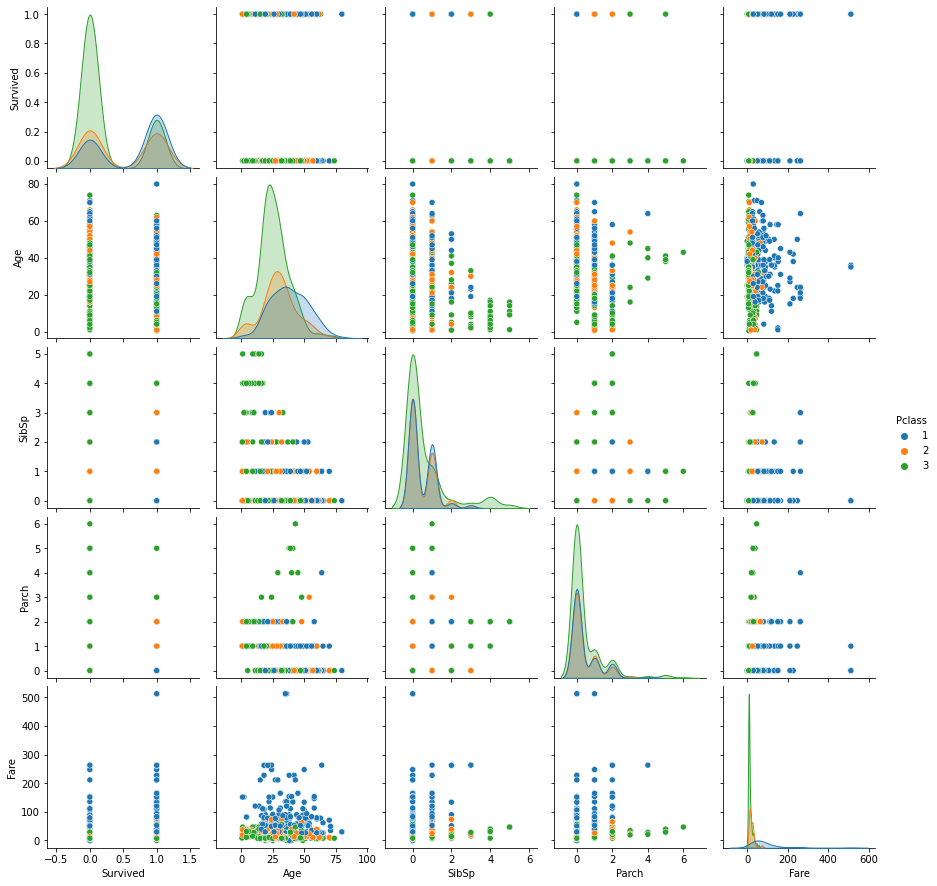

In [12]:
# pairplot
sns.pairplot(df_2.drop(['PassengerId'], axis=1), hue="Pclass", palette="tab10")

Исходя из графика:

    * Большие семьи брали себе самые дешевые билеты
    
    * Траты второго и третьего класса имеют неочень большой разброс по суммам и не мало различпется между собой
    
    * люди из первого класса могли себе позволить себе тратить очень разные суммы

Сложно смотерь на 25 графиков одновременно, поэтому делаю тепловую карту.


<AxesSubplot:>

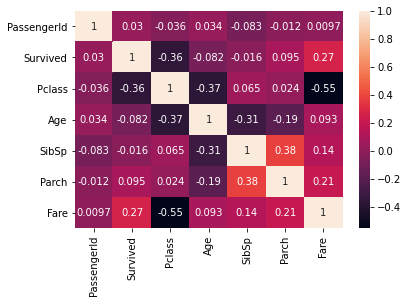

In [13]:
sns.heatmap(df_2.corr() , annot=True)

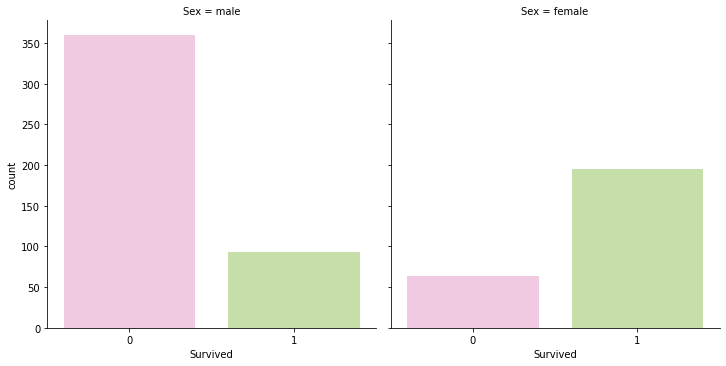

In [14]:
# Просто смотрю внимательней на число погибших и выживших среди разных полов
sns.catplot(data=df_2, x='Survived', col='Sex', kind='count', palette="PiYG")

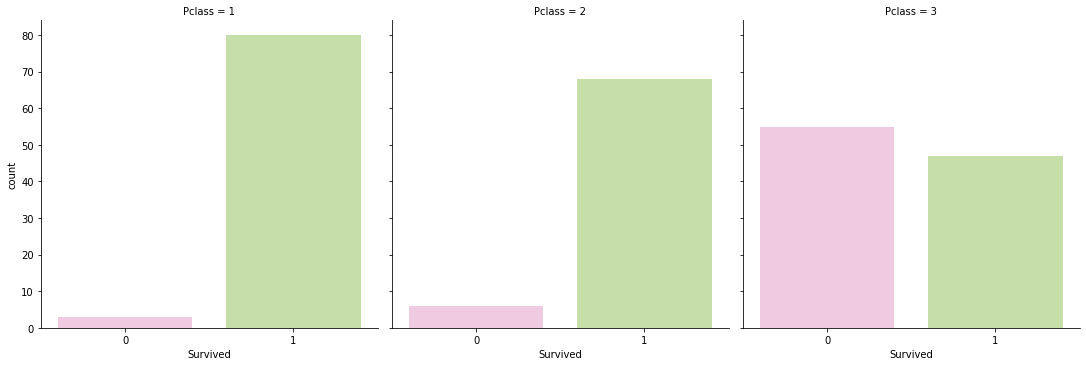

In [15]:
# посмотрим в каком классе больше погибло женщин
sns.catplot(data=df_2[df_2["Sex"] == "female"], x='Survived', col='Pclass', kind='count', palette="PiYG")

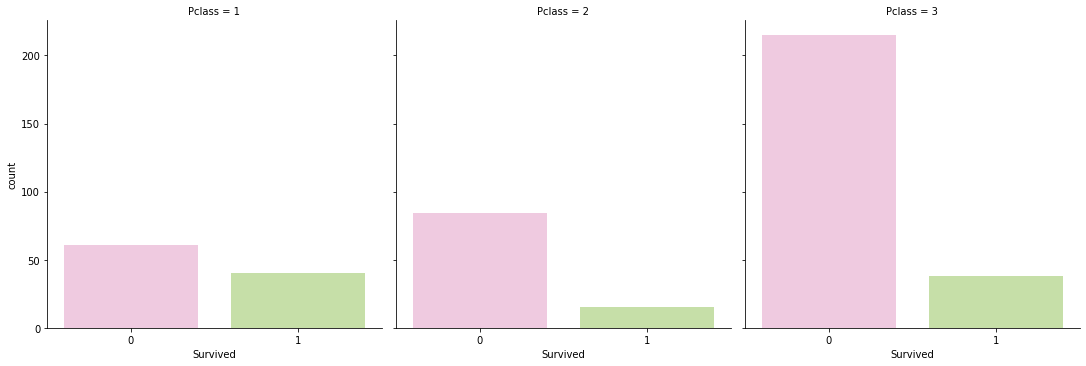

In [16]:
# посмотрим в каком классе больше погибло мужчин
sns.catplot(data=df_2[df_2["Sex"] == "male"], x='Survived', col='Pclass', kind='count', palette="PiYG")

In [17]:
len(df_2[df_2["Sex"] == "female"])

259

In [18]:
len(df_2[df_2["Sex"] == "male"])

453

Отчетливо видно, что:
    
    * люди из дешевых классов погибали чаще
    
    * женщины спасались (были спасены) чаще


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

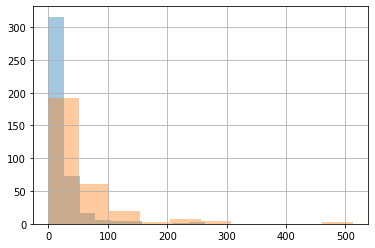

In [19]:
# еще раз посмотреть на связь между тратами и выживаемостью
df_2.groupby('Survived').Fare.hist(alpha=0.4)

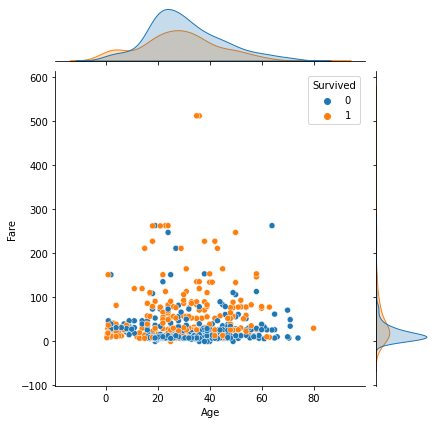

In [20]:
# Связь между возрастом и тратами, и выживаемостью
sns.jointplot(data=df_2, x="Age", y="Fare", hue= "Survived")
# Примерно с 20-60 период наибольшего расточистельства

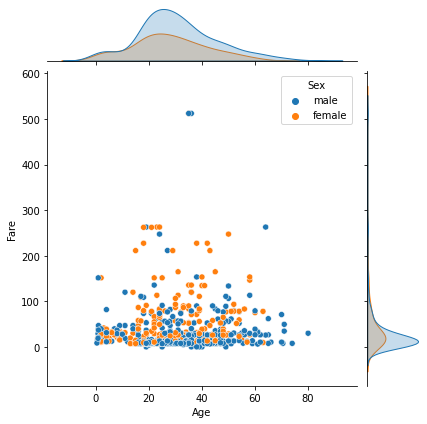

In [21]:
# Связь между полом и тратами, и выживаемостью
sns.jointplot(data=df_2, x="Age", y="Fare", hue= "Sex")
# За отметкой 200 в основном женщины, но самыми большими транжирами оказались двое мужчин , они кстати выжили